# Visualization demos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
from qutip import about, basis, identity, sigmax, sigmay, sigmaz

%matplotlib inline

## Hinton

In [2]:
rho = qt.rand_dm(5)

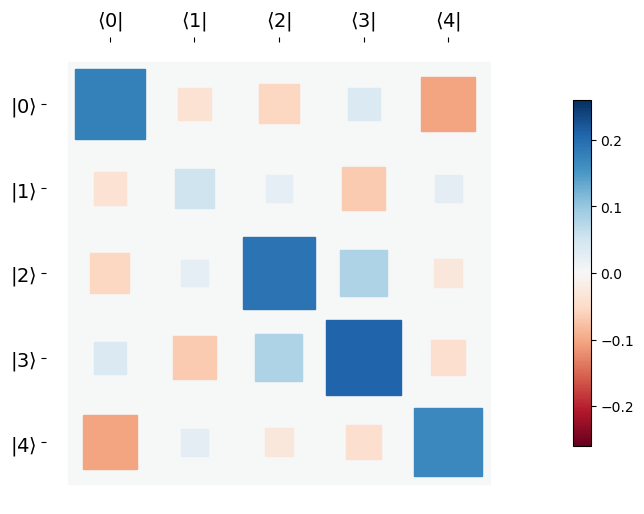

In [3]:
qt.hinton(rho);

## Sphereplot

In [4]:
theta = np.linspace(0, np.pi, 90)
phi = np.linspace(0, 2 * np.pi, 60)

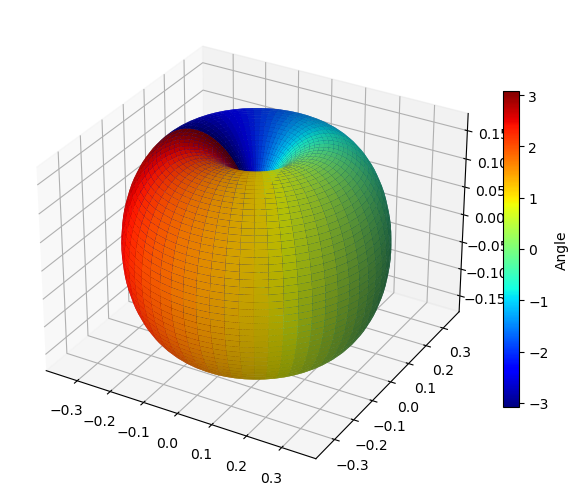

In [5]:
qt.sphereplot(theta, phi, qt.orbital(theta, phi, basis(3, 0)).T);

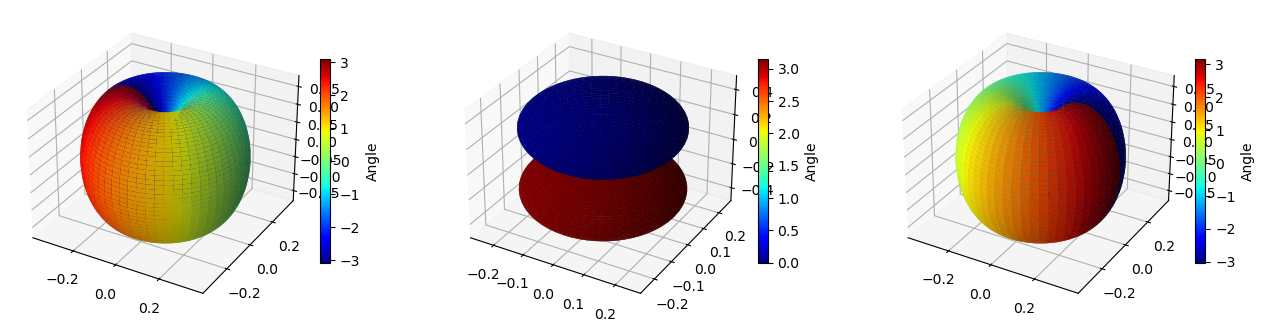

In [6]:
fig = plt.figure(figsize=(16, 4))

ax = fig.add_subplot(1, 3, 1, projection="3d")
qt.sphereplot(theta, phi, qt.orbital(theta, phi, basis(3, 0)).T, fig, ax)

ax = fig.add_subplot(1, 3, 2, projection="3d")
qt.sphereplot(theta, phi, qt.orbital(theta, phi, basis(3, 1)).T, fig, ax)

ax = fig.add_subplot(1, 3, 3, projection="3d")
qt.sphereplot(theta, phi, qt.orbital(theta, phi, basis(3, 2)).T, fig, ax);

# Matrix histogram

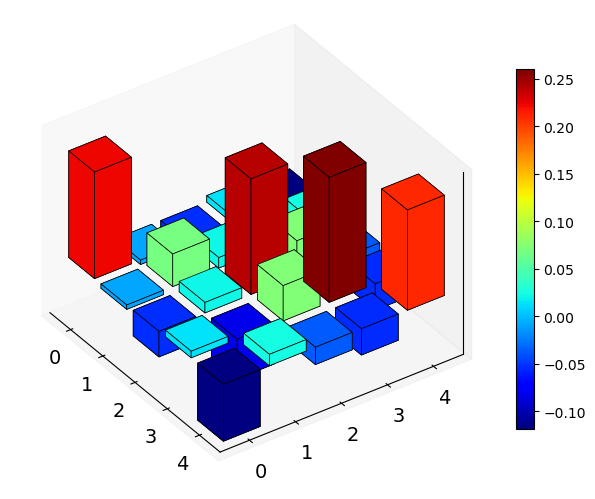

In [7]:
qt.matrix_histogram(rho.full().real);

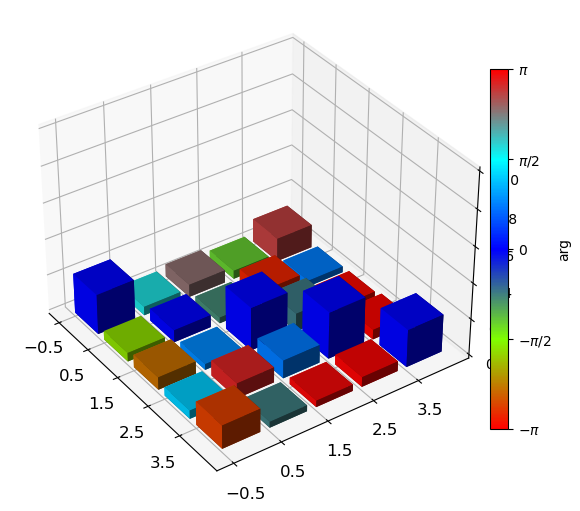

In [8]:
qt.matrix_histogram_complex(rho.full());

# Plot energy levels

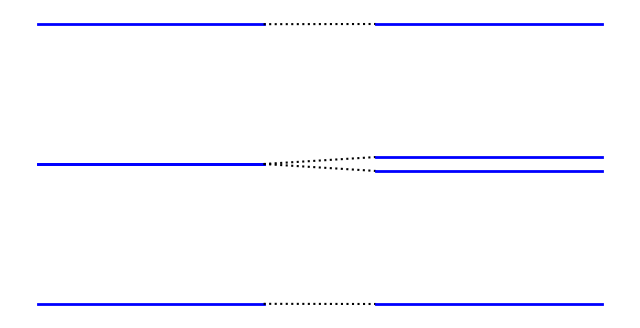

In [9]:
H0 = qt.tensor(sigmaz(), identity(2)) + qt.tensor(identity(2), sigmaz())
Hint = 0.1 * qt.tensor(sigmax(), sigmax())

qt.plot_energy_levels([H0, Hint], figsize=(8, 4));

# Plot Fock distribution

In [10]:
rho = (qt.coherent(15, 1.5) + qt.coherent(15, -1.5)).unit()

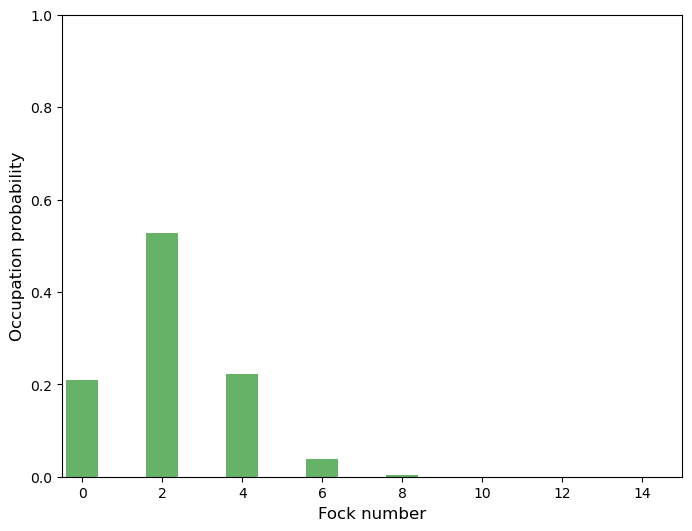

In [11]:
qt.plot_fock_distribution(rho);

# Plot Wigner function and Fock distribution

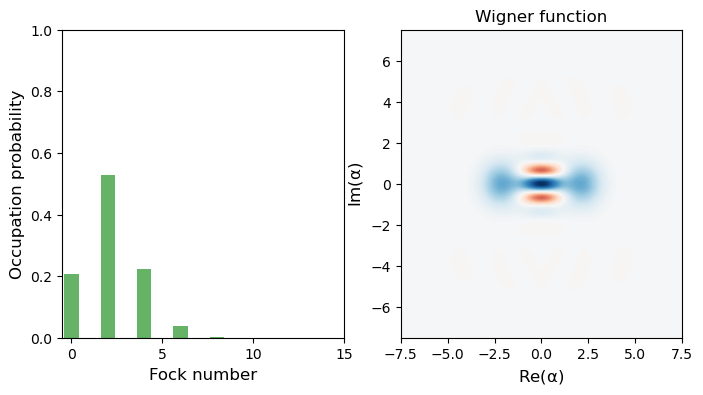

In [12]:
qt.plot_wigner_fock_distribution(rho);

# Plot winger function

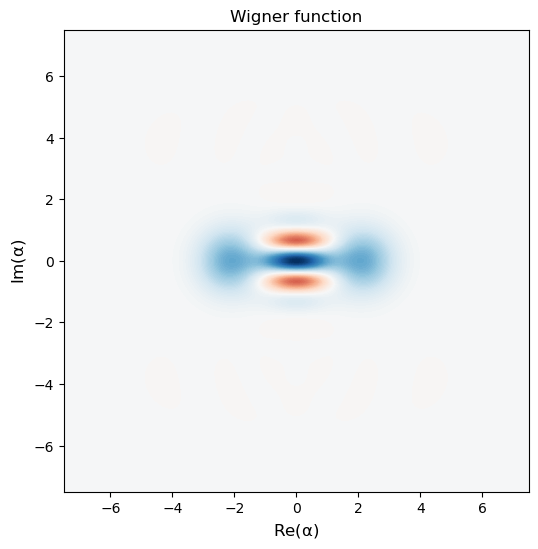

In [13]:
qt.plot_wigner(rho, figsize=(6, 6));

# Plot expectation values

In [14]:
H = sigmaz() + 0.3 * sigmay()
e_ops = [sigmax(), sigmay(), sigmaz()]
times = np.linspace(0, 10, 100)
psi0 = (basis(2, 0) + basis(2, 1)).unit()
result = qt.mesolve(H, psi0, times, [], e_ops)

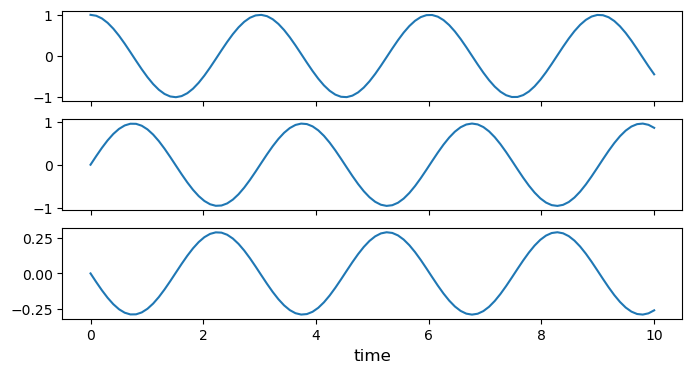

In [15]:
qt.plot_expectation_values(result);

# Bloch sphere

In [16]:
b = qt.Bloch()
b.add_vectors(qt.expect(H.unit(), e_ops))
b.add_points(result.expect, meth="l")
b.make_sphere()

# Plot spin Q-functions

In [17]:
j = 5
psi = qt.spin_state(j, -j)
psi = qt.spin_coherent(j, np.random.rand() * np.pi,
                       np.random.rand() * 2 * np.pi)
rho = qt.ket2dm(psi)

In [18]:
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)

In [19]:
Q, THETA, PHI = qt.spin_q_function(psi, theta, phi)

## 2D

/home/runner/work/qutip-tutorials/qutip-tutorials/qutip/qutip/visualization.py:1313: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  ax.pcolor(X, Y, P.real, cmap=cmap)


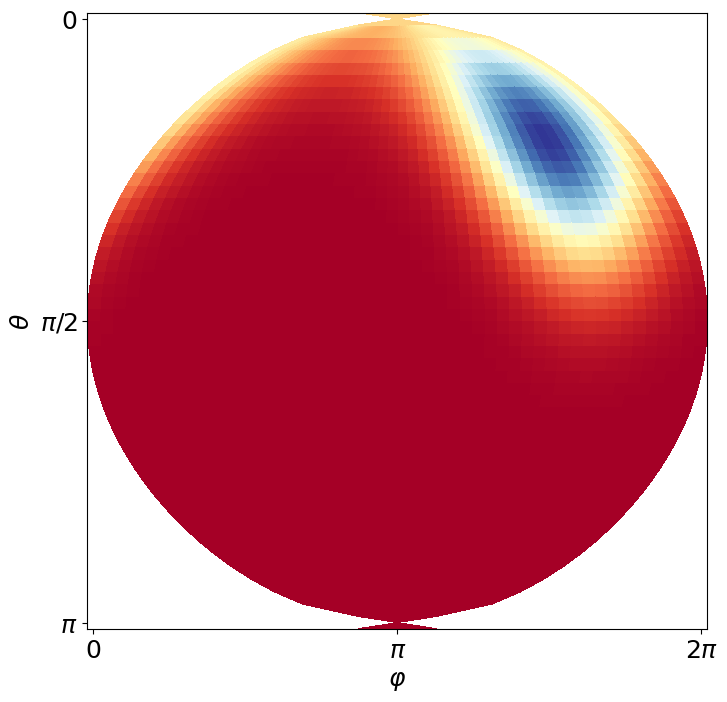

In [20]:
qt.plot_spin_distribution_2d(Q, THETA, PHI);

## 3D

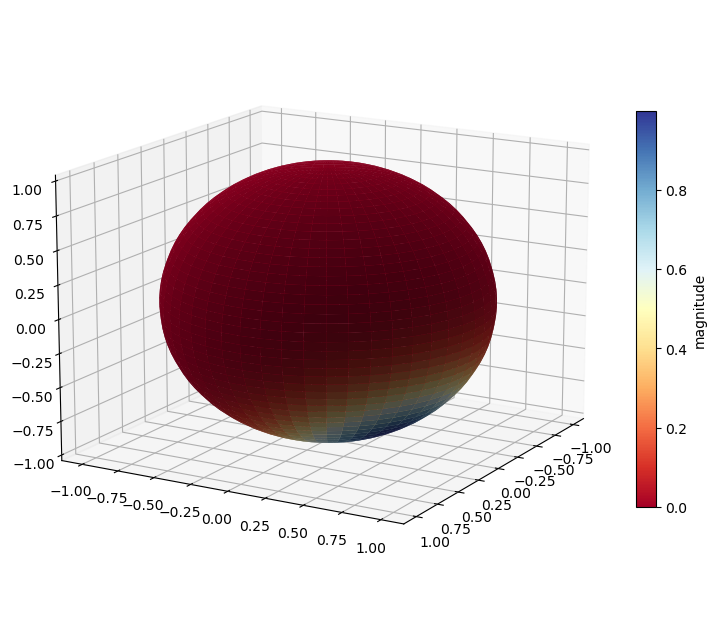

In [21]:
fig, ax = qt.plot_spin_distribution_3d(Q, THETA, PHI)

ax.view_init(15, 30)

## Combined 2D and 3D

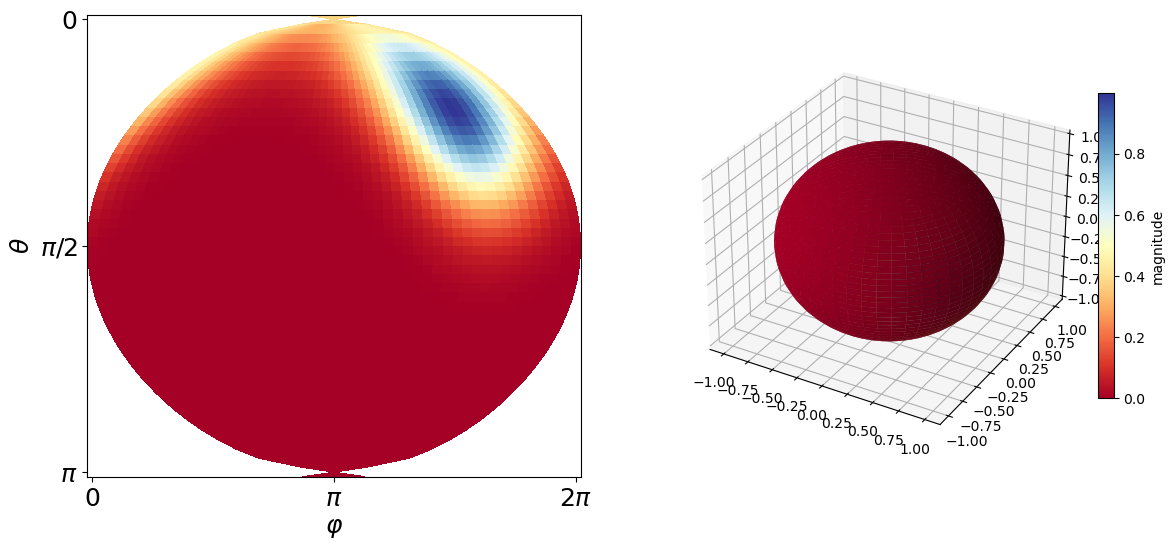

In [22]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
f1, a1 = qt.plot_spin_distribution_2d(Q, THETA, PHI, fig=fig, ax=ax)

ax = fig.add_subplot(1, 2, 2, projection="3d")
f2, a2 = qt.plot_spin_distribution_3d(Q, THETA, PHI, fig=fig, ax=ax)

# Plot spin-Wigner functions

In [23]:
W, THETA, PHI = qt.spin_wigner(psi, theta, phi)

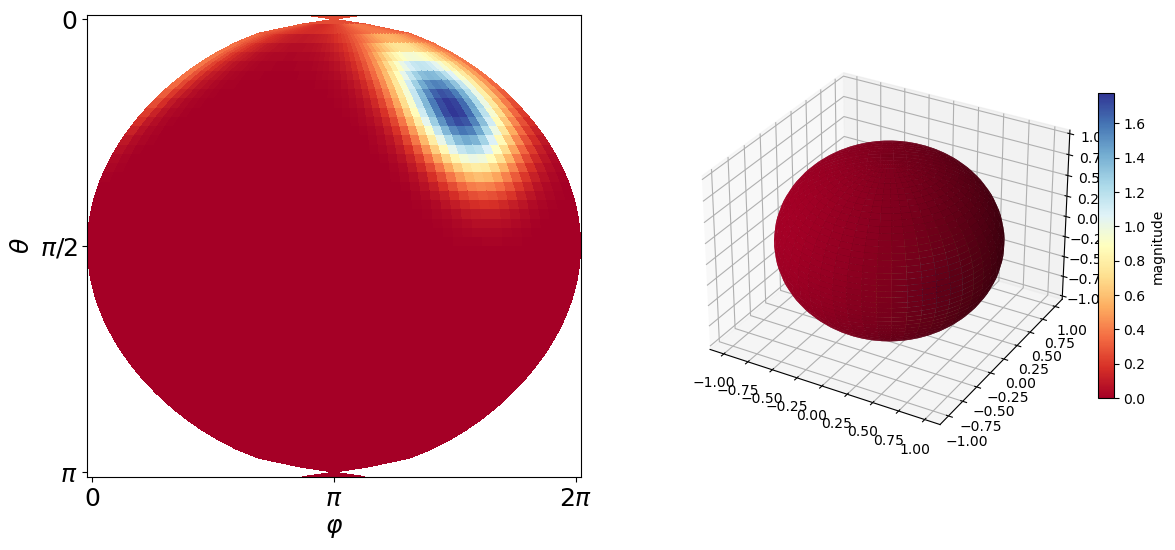

In [24]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
f1, a1 = qt.plot_spin_distribution_2d(W.real, THETA, PHI, fig=fig, ax=ax)

ax = fig.add_subplot(1, 2, 2, projection="3d")
f2, a2 = qt.plot_spin_distribution_3d(W.real, THETA, PHI, fig=fig, ax=ax)

# Versions

In [25]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.1
Numpy Version:      1.22.4
Scipy Version:      1.8.1
Cython Version:     0.29.33
Matplotlib Version: 3.5.2
Python Version:     3.10.4
Number of CPUs:     2
BLAS Info:          Generic
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/work/qutip-tutorials/qutip-tutorials/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily gene